In [4]:
import numpy as np
import sys
sys.path.append('../wofs_phi')
import config as c
import utilities
from sklearn.metrics import brier_score_loss as BS
import os
from shutil import copy
import shutil
import copy
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.ticker as ticker
import datetime as dt
import matplotlib as mpl
from wofs_phi import MLTrainer as t
from wofs_phi import Grid
#import imageio.v3 as iio
#import skexplain
from copy import deepcopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import pickle
from matplotlib import rc, font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from wofs.common.zarr import open_dataset
import matplotlib.colors as mpl_colors
import netCDF4 as ncdf
import statistics as stat
import netCDF4 as nc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import cartopy

In [5]:
def load_conus():
    lats = np.load('/work/ryan.martz/wofs_phi_data/experiments/conus_latitudes.npy')
    lons = ((np.load('/work/ryan.martz/wofs_phi_data/experiments/conus_longitudes.npy') - 180) % 360) - 180
    return lats, lons

In [6]:
def bin_probs(probs, bins):
    
    prob_sort_bins = np.searchsorted(bins, probs)
    counts = np.bincount(np.append(prob_sort_bins, np.arange(0,bins.shape[0]))) - 1
    
    return counts

In [20]:
conus_lats, conus_lons = load_conus()
fig, ax = plt.subplots(3, 3, subplot_kw={'projection': ccrs.LambertConformal()})

conus_hail_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/hail_lsrs_spatial_climo_conus.npy')
ax[0,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[0,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Greens')
cmap.set_under('white')
plot_conus_hail_lsrs = copy.deepcopy(conus_hail_lsrs)
plot_conus_hail_lsrs[plot_conus_hail_lsrs == 0] -= 1
p = ax[0,0].pcolormesh(conus_lons, conus_lats, plot_conus_hail_lsrs, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 20)
ax[0,0].set_title('Hail Report Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[0,0], orientation = 'horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[0,0].text(0.02, 1.03, '(a)', transform = ax[0,0].transAxes, fontweight = 'bold')

conus_hail_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/hail_warnings_spatial_climo_conus.npy')
ax[0,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[0,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Greens')
cmap.set_under('white')
plot_conus_hail_warnings = copy.deepcopy(conus_hail_warnings)
plot_conus_hail_warnings[plot_conus_hail_warnings == 0] -= 1
p = ax[0,1].pcolormesh(conus_lons, conus_lats, plot_conus_hail_warnings, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 20)
ax[0,1].set_title('Hail Warning Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[0,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[0,1].text(0.02, 1.03, '(b)', transform = ax[0,1].transAxes, fontweight = 'bold')

conus_wind_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/wind_lsrs_spatial_climo_conus.npy')
ax[1,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[1,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plot_conus_wind_lsrs = copy.deepcopy(conus_wind_lsrs)
plot_conus_wind_lsrs[plot_conus_wind_lsrs == 0] -= 1
p = ax[1,0].pcolormesh(conus_lons, conus_lats, plot_conus_wind_lsrs, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 20)
ax[1,0].set_title('Wind Report Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[1,0], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[1,0].text(0.02, 1.03, '(d)', transform = ax[1,0].transAxes, fontweight = 'bold')

conus_wind_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/wind_warnings_spatial_climo_conus.npy')
ax[1,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[1,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Blues')
cmap.set_under('white')
plot_conus_wind_warnings = copy.deepcopy(conus_wind_warnings)
plot_conus_wind_warnings[plot_conus_wind_warnings == 0] -= 1
p = ax[1,1].pcolormesh(conus_lons, conus_lats, plot_conus_wind_warnings, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 20)
ax[1,1].set_title('Wind Warning Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[1,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[1,1].text(0.02, 1.03, '(e)', transform = ax[1,1].transAxes, fontweight = 'bold')

conus_tor_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/tornado_lsrs_spatial_climo_conus.npy')
ax[2,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[2,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Reds')
cmap.set_under('white')
plot_conus_tor_lsrs = copy.deepcopy(conus_tor_lsrs)
plot_conus_tor_lsrs[plot_conus_tor_lsrs == 0] -= 1
p = ax[2,0].pcolormesh(conus_lons, conus_lats, plot_conus_tor_lsrs, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 10)
ax[2,0].set_title('Tornado Report Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[2,0], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[2,0].text(0.02, 1.03, '(g)', transform = ax[2,0].transAxes, fontweight = 'bold')

conus_tor_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/spatial_climatology/tornado_warnings_spatial_climo_conus.npy')
ax[2,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[2,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Reds')
cmap.set_under('white')
plot_conus_tor_warnings = copy.deepcopy(conus_tor_warnings)
plot_conus_tor_warnings[plot_conus_tor_warnings == 0] -= 1
p = ax[2,1].pcolormesh(conus_lons, conus_lats, plot_conus_tor_warnings, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = 0, vmax = 10)
ax[2,1].set_title('Tornado Warning Climatology', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[2,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[2,1].text(0.02, 1.03, '(h)', transform = ax[2,1].transAxes, fontweight = 'bold')


hail_report_warning_diff = conus_hail_warnings - conus_hail_lsrs
ax[0,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[0,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('bwr')
p = ax[0,2].pcolormesh(conus_lons, conus_lats, hail_report_warning_diff, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = -15, vmax = 15)
ax[0,2].set_title('Hail Warnings - Reports', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[0,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[0,2].text(0.02, 1.03, '(c)', transform = ax[0,2].transAxes, fontweight = 'bold')

wind_report_warning_diff = conus_wind_warnings - conus_wind_lsrs
ax[1,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[1,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('bwr')
p = ax[1,2].pcolormesh(conus_lons, conus_lats, wind_report_warning_diff, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = -15, vmax = 15)
ax[1,2].set_title('Wind Warnings - Reports', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[1,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[1,2].text(0.02, 1.03, '(f)', transform = ax[1,2].transAxes, fontweight = 'bold')

tor_report_warning_diff = conus_tor_warnings - conus_tor_lsrs
ax[2,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
ax[2,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('bwr')
p = ax[2,2].pcolormesh(conus_lons, conus_lats, tor_report_warning_diff, alpha = 0.75, transform=ccrs.PlateCarree(),\
           cmap = cmap, antialiased = True, vmin = -7.5, vmax = 7.5)
ax[2,2].set_title('Tornado Warnings - Reports', fontname = 'DejaVu Sans', fontsize = 12)
cbar = fig.colorbar(p, ax=ax[2,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
cbar.ax.tick_params(labelsize=10)
ax[2,2].text(0.02, 1.03, '(i)', transform = ax[2,2].transAxes, fontweight = 'bold')

fig.set_size_inches(13, 10)
fig.tight_layout()

fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
            'spatial_event_climatologies.png', dpi=300)


In [7]:
conus_lats, conus_lons = load_conus()
wofs_climo = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                     'spatial_climatology/wofs_grids_spatial_climo_conus.npy')

hail_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                             'climatologies/temporal_climatology/hail_lsrs_temporal_climo.npy')
hail_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'hail_lsrs_temporal_climo_gridpoints.npy')
hail_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                 'climatologies/temporal_climatology/hail_warnings_temporal_climo.npy')
wind_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                             'climatologies/temporal_climatology/wind_lsrs_temporal_climo.npy')
wind_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'wind_lsrs_temporal_climo_gridpoints.npy')
wind_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                 'climatologies/temporal_climatology/wind_warnings_temporal_climo.npy')
tor_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                            'temporal_climatology/tornado_lsrs_temporal_climo.npy')
tor_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'tornado_lsrs_temporal_climo_gridpoints.npy')
tor_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                'temporal_climatology/tornado_warnings_temporal_climo.npy')

hail_warnings = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                        'hail_warning_fcst_climos_bootstrapped.npy')
hail_lsrs_39 = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                       'hail_39km_lsr_fcst_climos_bootstrapped.npy')


wind_warnings = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                        'wind_warning_fcst_climos_bootstrapped.npy')
wind_lsrs_375 = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                       'wind_375km_lsr_fcst_climos_bootstrapped.npy')

tor_warnings = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                       'tornado_warning_fcst_climos_bootstrapped.npy')
tor_lsrs_39 = np.load('/work/ryan.martz/wofs_phi_data/training_data/warnings/'\
                      'tornado_39km_lsr_fcst_climos_bootstrapped.npy')

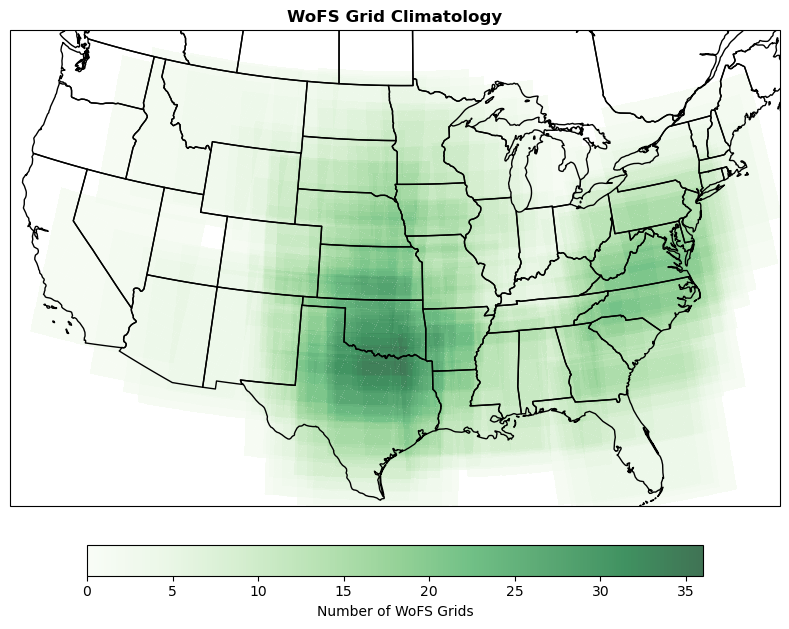

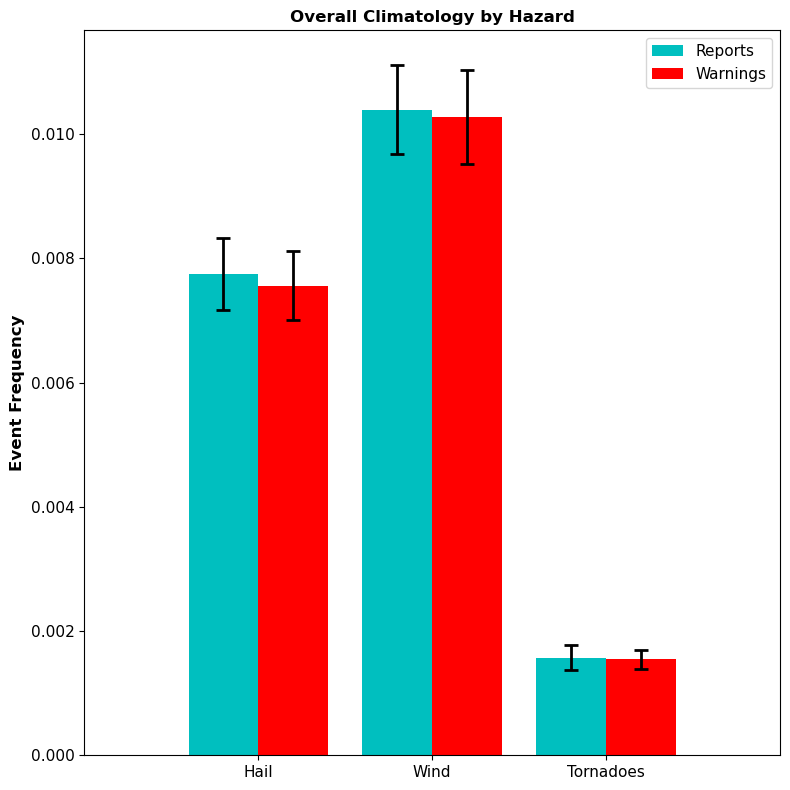

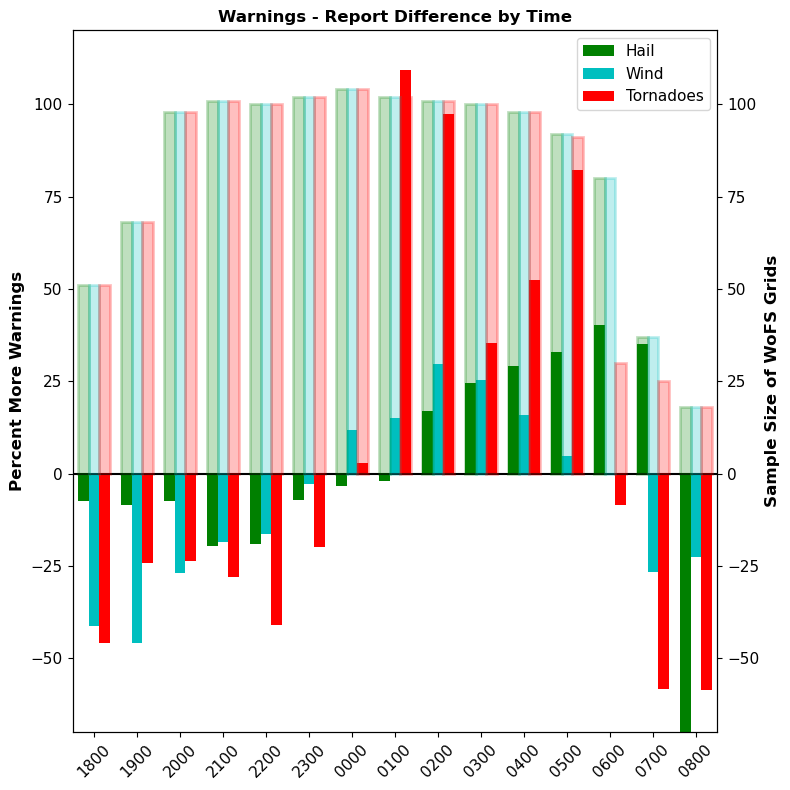

In [10]:
%matplotlib inline
############################ WoFS Climo ############################

fig = plt.figure()
xticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')
yticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')

wofs_ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
fig.set_size_inches(5, 5)
wofs_ax.set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
wofs_ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
cmap = plt.get_cmap('Greens')
cmap.set_under('white')
plot_wofs_climo = copy.deepcopy(wofs_climo)
plot_wofs_climo[plot_wofs_climo == 0] -= 1
p = wofs_ax.pcolormesh(conus_lons, conus_lats, plot_wofs_climo, alpha = 0.75,\
                       transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                       vmin = 0, vmax = np.max(plot_wofs_climo))
wofs_ax.set_title('WoFS Grid Climatology', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
#cbar_ax = fig.add_axes([0.22, 0.7, 0.7, 0.02])
#cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar = fig.colorbar(p, ax=wofs_ax, orientation = 'horizontal', pad = 0.05, shrink = 0.8)
cbar.set_label('Number of WoFS Grids')
cbar.ax.tick_params(labelsize=10)
#wofs_ax.text(0, 1.02, '(a)', fontweight = 'bold', transform=wofs_ax.transAxes)

fig.set_size_inches(8, 8)
fig.tight_layout()

fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
            'wofs_climatologies.png', dpi=300)

############################ Overall Climo ############################

fig = plt.figure()
overall_climo_ax = fig.add_subplot(1, 1, 1)
x_ticks = np.arange(0,3)
overall_climo_ax.bar([-0.2], np.mean(hail_lsrs_39), width = 0.4, color = 'c', label = 'Reports')
overall_climo_ax.bar([0.2], np.mean(hail_warnings), width = 0.4, color = 'r', label = 'Warnings')
overall_climo_ax.bar([0.8], np.mean(wind_lsrs_375), width = 0.4, color = 'c')
overall_climo_ax.bar([1.2], np.mean(wind_warnings), width = 0.4, color = 'r')
overall_climo_ax.bar([1.8], np.mean(tor_lsrs_39), width = 0.4, color = 'c')
overall_climo_ax.bar([2.2], np.mean(tor_warnings), width = 0.4, color = 'r')
overall_climo_ax.spines["top"].set_visible(True)
overall_climo_ax.spines["right"].set_visible(True)

ci_size = 95
upper_bound = 100 - ((100-ci_size)/2)
lower_bound = (100-ci_size)/2

overall_climo_ax.errorbar(-0.2, np.mean(hail_lsrs_39), yerr = (np.percentile(hail_lsrs_39, upper_bound) - np.percentile(hail_lsrs_39, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)
overall_climo_ax.errorbar(0.2, np.mean(hail_warnings), yerr = (np.percentile(hail_warnings, upper_bound) - np.percentile(hail_warnings, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)

overall_climo_ax.errorbar(0.8, np.mean(wind_lsrs_375), yerr = (np.percentile(wind_lsrs_375, upper_bound) - np.percentile(wind_lsrs_375, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)
overall_climo_ax.errorbar(1.2, np.mean(wind_warnings), yerr = (np.percentile(wind_warnings, upper_bound) - np.percentile(wind_warnings, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)

overall_climo_ax.errorbar(1.8, np.mean(tor_lsrs_39), yerr = (np.percentile(tor_lsrs_39, upper_bound) - np.percentile(tor_lsrs_39, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)
overall_climo_ax.errorbar(2.2, np.mean(tor_warnings), yerr = (np.percentile(tor_warnings, upper_bound) - np.percentile(tor_warnings, lower_bound))/2,\
            color = 'k', solid_capstyle='projecting', capsize=5, elinewidth = 2, capthick = 2)

for label in overall_climo_ax.get_yticklabels():
    label.set_fontproperties(yticks_font)

overall_climo_ax.set_xticks(x_ticks)
overall_climo_ax.set_xticklabels(["Hail", "Wind", "Tornadoes"])
for label in overall_climo_ax.get_xticklabels():
    label.set_fontproperties(xticks_font)

overall_climo_ax.set_xlim([-1,3])

overall_climo_ax.legend(prop=legend_font)
overall_climo_ax.set_title('Overall Climatology by Hazard', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
overall_climo_ax.set_ylabel('Event Frequency', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
#overall_climo_ax.text(0, 1.02, '(b)', fontweight = 'bold', transform=overall_climo_ax.transAxes)

fig.set_size_inches(8, 8)
fig.tight_layout()

fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
            'overall_climatologies.png', dpi=300)

############################ Temporal Climo ############################

fig = plt.figure()
temporal_ax = fig.add_subplot(1, 1, 1)

hail_diffs = hail_warnings_temporal[1:] - hail_lsrs_temporal[1:]
hail_relative_climo_diff = (hail_diffs/hail_lsrs_temporal[1:]) * 100
hail_fcst_grids = hail_grid_points/90000

wind_diffs = wind_warnings_temporal[1:] - wind_lsrs_temporal[1:]
wind_relative_climo_diff = (wind_diffs/wind_lsrs_temporal[1:]) * 100
wind_fcst_grids = wind_grid_points/90000

tor_diffs = tor_warnings_temporal[1:] - tor_lsrs_temporal[1:]
tor_relative_climo_diff = (tor_diffs/tor_lsrs_temporal[1:]) * 100
tor_fcst_grids = tor_grid_points/90000

x_ticks = np.arange(0,15)
temporal_ax.plot([-3,16], [0,0], color = 'k')
#temporal_ax.plot(hail_diffs, color = 'g')
#temporal_ax.plot(wind_diffs, color = 'b')
#temporal_ax.plot(tor_diffs, color = 'r')

sample_size_ax = temporal_ax.twinx()
sample_size_ax.bar(x_ticks-0.25, hail_fcst_grids[1:], width = 0.25, color = 'g', label = 'Hail',\
                   alpha = 0.25, edgecolor = 'g', linewidth = 2)
sample_size_ax.bar(x_ticks, wind_fcst_grids[1:], width = 0.25, color = 'c', label = 'Wind',\
                   alpha = 0.25, edgecolor = 'c', linewidth = 2)
sample_size_ax.bar(x_ticks+0.25, tor_fcst_grids[1:], width = 0.25, color = 'r', label = 'Tornadoes',\
                   alpha = 0.25, edgecolor = 'r', linewidth = 2)

temporal_ax.bar(x_ticks-0.25, hail_relative_climo_diff, width = 0.25, color = 'g', label = 'Hail')
temporal_ax.bar(x_ticks, wind_relative_climo_diff, width = 0.25, color = 'c', label = 'Wind')
temporal_ax.bar(x_ticks+0.25, tor_relative_climo_diff, width = 0.25, color = 'r', label = 'Tornadoes')
temporal_ax.spines["top"].set_visible(True)
temporal_ax.spines["right"].set_visible(True)

for label in temporal_ax.get_yticklabels():
    label.set_fontproperties(yticks_font)
for label in sample_size_ax.get_yticklabels():
    label.set_fontproperties(yticks_font)

temporal_ax.set_xticks(x_ticks)
temporal_ax.set_xticklabels(["1800", "1900", "2000", "2100", "2200", "2300", "0000",\
                             "0100", "0200", "0300", "0400", "0500", "0600", "0700", "0800"])
temporal_ax.tick_params(axis = 'x', rotation=45)
for label in temporal_ax.get_xticklabels():
    label.set_fontproperties(xticks_font)

temporal_ax.set_xlim([-0.5,14.5])
temporal_ax.set_ylim([-70,120])
sample_size_ax.set_ylim([-70,120])

temporal_ax.legend(prop = legend_font)
temporal_ax.set_title('Warnings - Report Difference by Time', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
temporal_ax.set_ylabel('Percent More Warnings', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
sample_size_ax.set_ylabel('Sample Size of WoFS Grids', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
#temporal_ax.set_xlabel('Start Time', fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
#temporal_ax.text(0, 1.02, '(c)', fontweight = 'bold', transform=temporal_ax.transAxes)

fig.set_size_inches(8, 8)
fig.tight_layout()

fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
            'temporal_climatologies.png', dpi=300)

#fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
#            'wofs_overall_temporal_climatologies.png')

In [26]:
hail_minutes_dur = 0
hail_instances = 0
wind_minutes_dur = 0
wind_instances = 0
tor_minutes_dur = 0
tor_instances = 0
for year in ['2019', '2020', '2021']:
    warnings_csv = pd.read_csv('/work/ryan.martz/wofs_phi_data/training_data/warnings/warning_csvs/warnings_%s.csv' %(year))
    for index, row in warnings_csv.iterrows():
        start_dt = dt.datetime(row['ISSUED_YEAR'], row['ISSUED_MONTH'], row['ISSUED_DAY'], row['ISSUED_HOUR'], row['ISSUED_MINUTE'])
        end_dt = dt.datetime(row['EXPIRED_YEAR'], row['EXPIRED_MONTH'], row['EXPIRED_DAY'], row['EXPIRED_HOUR'], row['EXPIRED_MINUTE'])
        duration = (end_dt - start_dt).seconds/60
        if row['WIND_MAP'] == 1:
            wind_minutes_dur += duration
            wind_instances += 1
        elif row['HAIL_MAP'] == 1:
            hail_minutes_dur += duration
            hail_instances += 1
        elif row['TORNADO_MAP'] == 1:
            tor_minutes_dur += duration
            tor_instances += 1

In [27]:
wind_minutes_dur/wind_instances

42.87534522946741

In [28]:
hail_minutes_dur/hail_instances

36.228250553622274

In [29]:
tor_minutes_dur/tor_instances

29.582120155833504

In [23]:
conus_lats, conus_lons = load_conus()

leads = [0, 60, 120]
for lead in leads:
    
    hail_wind_raw_lim = 10
    hail_wind_diff_lim = 5
    tor_raw_lim = 3
    tor_diff_lim = 1.5
    
    scale_up = 1
    
    #if lead >= 120:
    #    scale_down = 1.4157303370786516
    #    hail_wind_raw_lim = hail_wind_raw_lim/scale_down
    #    hail_wind_diff_lim = hail_wind_diff_lim/scale_down
    #    tor_raw_lim = tor_raw_lim/scale_down
    #    tor_diff_lim = tor_diff_lim/scale_down
        
    
    
    
    fig, ax = plt.subplots(3, 3, subplot_kw={'projection': ccrs.LambertConformal()})
    
    conus_hail_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                              'spatial_climatology/hail_lsrs_probs_spatial_climo'\
                              '_conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[0,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[0,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Greens')
    cmap.set_under('white')
    plot_conus_hail_lsrs = copy.deepcopy(conus_hail_lsrs)
    plot_conus_hail_lsrs[plot_conus_hail_lsrs == 0] -= 1
    p = ax[0,0].pcolormesh(conus_lons, conus_lats, plot_conus_hail_lsrs, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = 0, vmax = hail_wind_raw_lim)
    ax[0,0].set_title('Hail Report Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[0,0], orientation = 'horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[0,0].text(0.02, 1.03, '(a)', transform = ax[0,0].transAxes, fontweight = 'bold')
    
    conus_hail_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                  'spatial_climatology/hail_warnings_probs_spatial_climo_'\
                                  'conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[0,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[0,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Greens')
    cmap.set_under('white')
    plot_conus_hail_warnings = copy.deepcopy(conus_hail_warnings)
    plot_conus_hail_warnings[plot_conus_hail_warnings == 0] -= 1
    p = ax[0,1].pcolormesh(conus_lons, conus_lats, plot_conus_hail_warnings, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = 0, vmax = hail_wind_raw_lim)
    ax[0,1].set_title('Hail Warning Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[0,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[0,1].text(0.02, 1.03, '(b)', transform = ax[0,1].transAxes, fontweight = 'bold')
    
    conus_wind_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                              'spatial_climatology/wind_lsrs_probs_spatial_climo'\
                              '_conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[1,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[1,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Blues')
    cmap.set_under('white')
    plot_conus_wind_lsrs = copy.deepcopy(conus_wind_lsrs)
    plot_conus_wind_lsrs[plot_conus_wind_lsrs == 0] -= 1
    p = ax[1,0].pcolormesh(conus_lons, conus_lats, plot_conus_wind_lsrs, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = 0, vmax = hail_wind_raw_lim)
    ax[1,0].set_title('Wind Report Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[1,0], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[1,0].text(0.02, 1.03, '(d)', transform = ax[1,0].transAxes, fontweight = 'bold')
    
    conus_wind_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                  'spatial_climatology/wind_warnings_probs_spatial_climo'\
                                  '_conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[1,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[1,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Blues')
    cmap.set_under('white')
    plot_conus_wind_warnings = copy.deepcopy(conus_wind_warnings)
    plot_conus_wind_warnings[plot_conus_wind_warnings == 0] -= 1
    p = ax[1,1].pcolormesh(conus_lons, conus_lats, plot_conus_wind_warnings, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = 0, vmax = hail_wind_raw_lim)
    ax[1,1].set_title('Wind Warning Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[1,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[1,1].text(0.02, 1.03, '(e)', transform = ax[1,1].transAxes, fontweight = 'bold')
    
    conus_tor_lsrs = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                             'spatial_climatology/tornado_lsrs_probs_spatial_climo'\
                             '_conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[2,0].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[2,0].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Reds')
    cmap.set_under('white')
    plot_conus_tor_lsrs = copy.deepcopy(conus_tor_lsrs)
    plot_conus_tor_lsrs[plot_conus_tor_lsrs == 0] -= 1
    p = ax[2,0].pcolormesh(conus_lons, conus_lats, plot_conus_tor_lsrs, alpha = 0.75,\
                           transform=ccrs.PlateCarree(),\
               cmap = cmap, antialiased = True, vmin = 0, vmax = tor_raw_lim)
    ax[2,0].set_title('Tornado Report Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[2,0], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[2,0].text(0.02, 1.03, '(g)', transform = ax[2,0].transAxes, fontweight = 'bold')
    
    conus_tor_warnings = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                 'spatial_climatology/tornado_warnings_probs_spatial_climo'\
                                 '_conus_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    ax[2,1].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[2,1].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('Reds')
    cmap.set_under('white')
    plot_conus_tor_warnings = copy.deepcopy(conus_tor_warnings)
    plot_conus_tor_warnings[plot_conus_tor_warnings == 0] -= 1
    p = ax[2,1].pcolormesh(conus_lons, conus_lats, plot_conus_tor_warnings, alpha = 0.75,\
                           transform=ccrs.PlateCarree(),\
               cmap = cmap, antialiased = True, vmin = 0, vmax = tor_raw_lim)
    ax[2,1].set_title('Tornado Warning Agg. Probabilities', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[2,1], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[2,1].text(0.02, 1.03, '(h)', transform = ax[2,1].transAxes, fontweight = 'bold')
    
    
    hail_report_warning_diff = conus_hail_warnings - conus_hail_lsrs
    ax[0,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[0,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('bwr')
    p = ax[0,2].pcolormesh(conus_lons, conus_lats, hail_report_warning_diff, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = -hail_wind_diff_lim, vmax = hail_wind_diff_lim)
    ax[0,2].set_title('Hail Warning Probs - Report Probs', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[0,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[0,2].text(0.02, 1.03, '(c)', transform = ax[0,2].transAxes, fontweight = 'bold')
    
    wind_report_warning_diff = conus_wind_warnings - conus_wind_lsrs
    ax[1,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[1,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('bwr')
    p = ax[1,2].pcolormesh(conus_lons, conus_lats, wind_report_warning_diff, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = -hail_wind_diff_lim, vmax = hail_wind_diff_lim)
    ax[1,2].set_title('Wind Warning Probs - Report Probs', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[1,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[1,2].text(0.02, 1.03, '(f)', transform = ax[1,2].transAxes, fontweight = 'bold')
    
    tor_report_warning_diff = conus_tor_warnings - conus_tor_lsrs
    ax[2,2].set_extent([-120, -73, 25.5, 50], crs=ccrs.PlateCarree())
    ax[2,2].add_feature(cfeature.STATES, edgecolor='black', linewidth=1)
    cmap = plt.get_cmap('bwr')
    p = ax[2,2].pcolormesh(conus_lons, conus_lats, tor_report_warning_diff, alpha = 0.75,\
                           transform=ccrs.PlateCarree(), cmap = cmap, antialiased = True,\
                           vmin = -tor_diff_lim, vmax = tor_diff_lim)
    ax[2,2].set_title('Tornado Warning Probs - Report Probs', fontname = 'DejaVu Sans', fontsize = 12)
    cbar = fig.colorbar(p, ax=ax[2,2], orientation='horizontal', pad = 0.02, shrink = 0.8)
    cbar.ax.tick_params(labelsize=10)
    ax[2,2].text(0.02, 1.03, '(i)', transform = ax[2,2].transAxes, fontweight = 'bold')

    fig.set_size_inches(13, 10)
    fig.suptitle('%s-%s Minutes' %(lead, lead+60), fontname = 'DejaVu Sans', fontsize = 15)
    fig.tight_layout()
    fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
                'spatial_prob_climatologies_%s-%smin.png' %(lead, lead+60), dpi=300)


/tmp/ipykernel_1552908/3847760468.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(3, 3, subplot_kw={'projection': ccrs.LambertConformal()})


In [9]:
np.max(plot_conus_tor_lsrs)

2.7363684947871776

/tmp/ipykernel_427652/2545607014.py:75: RuntimeWarning: invalid value encountered in divide
  hail_relative_diffs = (hail_diffs/hail_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:76: RuntimeWarning: invalid value encountered in divide
  wind_relative_diffs = (wind_diffs/wind_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:77: RuntimeWarning: invalid value encountered in divide
  tor_relative_diffs = (tor_diffs/tor_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:75: RuntimeWarning: invalid value encountered in divide
  hail_relative_diffs = (hail_diffs/hail_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:76: RuntimeWarning: invalid value encountered in divide
  wind_relative_diffs = (wind_diffs/wind_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:77: RuntimeWarning: invalid value encountered in divide
  tor_relative_diffs = (tor_diffs/tor_lsrs_temporal) * 100
/tmp/ipykernel_427652/2545607014.py:75: RuntimeWarning: invalid value encountered 

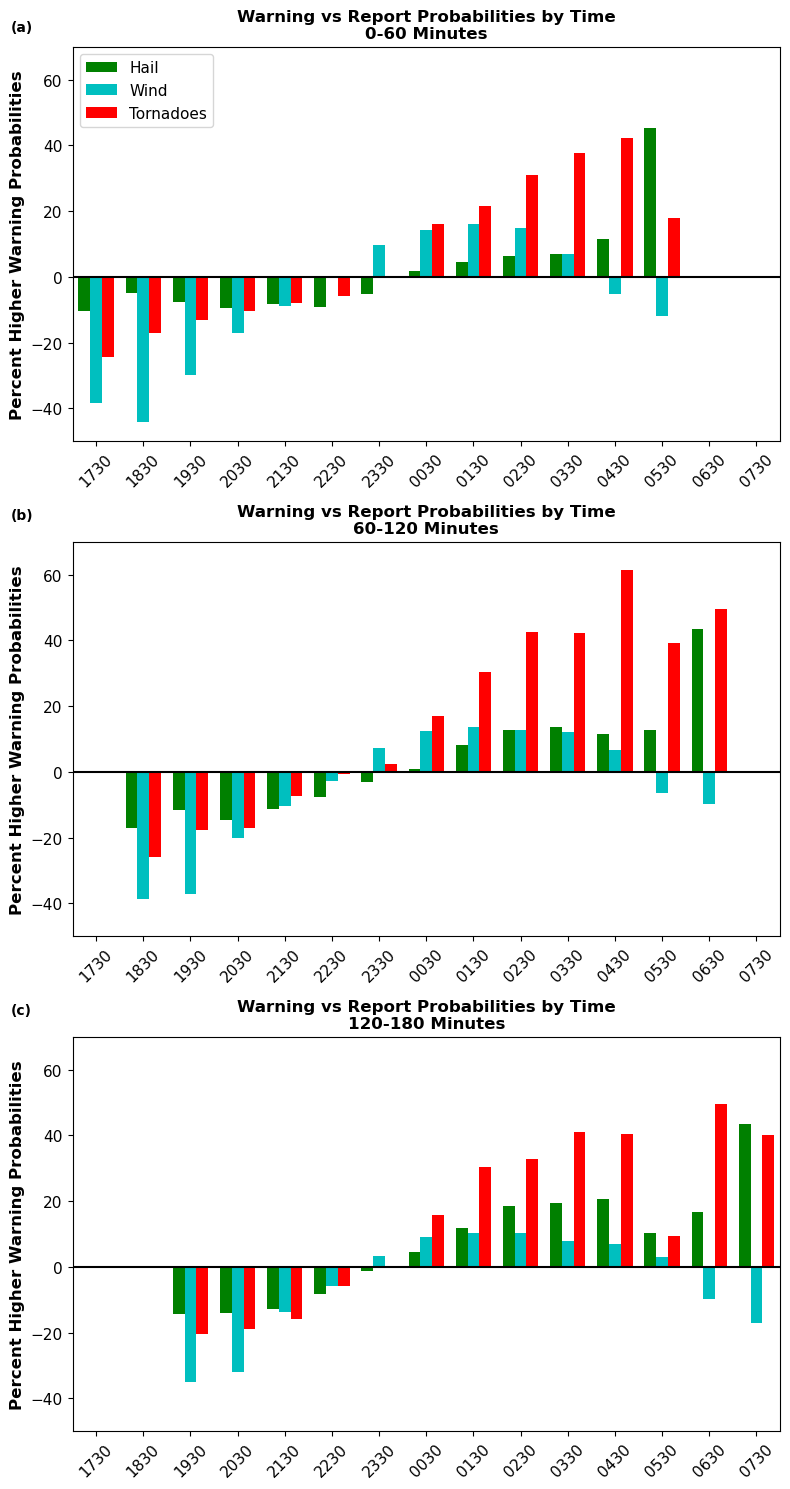

In [11]:
%matplotlib inline

fig, ax = plt.subplots(3,1)
xticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')
yticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')
legend_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=11, weight='normal', stretch='normal')

leads = [0, 60, 120]

for i in range(len(leads)):
    lead = leads[i]
    hail_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                 'climatologies/temporal_climatology/hail_lsrs_probs'\
                                 '_temporal_climo_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    hail_lsrs_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'hail_lsrs_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    hail_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                     'climatologies/temporal_climatology/hail_warnings_probs'\
                                     '_temporal_climo_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    hail_warnings_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'hail_warnings_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    wind_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                 'climatologies/temporal_climatology/wind_lsrs_probs'\
                                 '_temporal_climo_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    wind_lsrs_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'wind_lsrs_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    wind_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                     'climatologies/temporal_climatology/wind_warnings_probs'\
                                     '_temporal_climo_%s-%smin_top_hour_inits_only.npy' %(lead, lead+60))
    wind_warnings_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'wind_warnings_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    tor_lsrs_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                'temporal_climatology/tornado_lsrs_probs_temporal_climo_%s-%smin_top_hour_inits_only.npy'\
                                %(lead, lead+60))
    tor_warnings_temporal = np.load('/work/ryan.martz/wofs_phi_data/experiments/climatologies/'\
                                    'temporal_climatology/tornado_warnings_probs_temporal_climo_%s-%smin_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    tor_lsrs_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'tornado_lsrs_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    tor_warnings_grid_points = np.load('/work/ryan.martz/wofs_phi_data/experiments/'\
                                    'climatologies/temporal_climatology/'\
                                    'tornado_warnings_temporal_climo_%s-%smin_gridpoints_top_hour_inits_only.npy'\
                                    %(lead, lead+60))
    
    
    #if lead > 90:
    #    if lead == 120:
    #        indices = np.arange(1, 24, 2)
    #    elif lead == 150:
    #        indices = np.arange(0, 23, 2)
    #    hail_diffs = hail_warnings_temporal[indices] - hail_lsrs_temporal[indices]
    #    wind_diffs = wind_warnings_temporal[indices] - wind_lsrs_temporal[indices]
    #    tor_diffs = tor_warnings_temporal[indices] - tor_lsrs_temporal[indices]
    #    
    #    hail_relative_diffs = (hail_diffs/hail_lsrs_temporal[indices]) * 100
    #    wind_relative_diffs = (wind_diffs/wind_lsrs_temporal[indices]) * 100
    #    tor_relative_diffs = (tor_diffs/tor_lsrs_temporal[indices]) * 100
    #else:
    hail_diffs = hail_warnings_temporal - hail_lsrs_temporal
    wind_diffs = wind_warnings_temporal - wind_lsrs_temporal
    tor_diffs = tor_warnings_temporal - tor_lsrs_temporal
    hail_relative_diffs = (hail_diffs/hail_lsrs_temporal) * 100
    wind_relative_diffs = (wind_diffs/wind_lsrs_temporal) * 100
    tor_relative_diffs = (tor_diffs/tor_lsrs_temporal) * 100
    
    x_ticks = np.arange(0,15)
    ax[i].set_xticks(x_ticks)
    ax[i].plot([-3,17], [0,0], color = 'k')
    if (lead/30) % 2 == 0:
        ax[i].bar(x_ticks-0.25, hail_relative_diffs[1:31][::2], width = 0.25, color = 'g', label = 'Hail')
        ax[i].bar(x_ticks, wind_relative_diffs[1:31][::2], width = 0.25, color = 'c', label = 'Wind')
        ax[i].bar(x_ticks+0.25, tor_relative_diffs[1:31][::2], width = 0.25, color = 'r', label = 'Tornadoes')

        ax[i].set_xticklabels(["1730", "1830", "1930", "2030",\
                               "2130", "2230", "2330", "0030",\
                               "0130", "0230", "0330", "0430",\
                               "0530", "0630", "0730"])
    else:
        ax[i].bar(x_ticks-0.25, hail_relative_diffs[0:30][::2], width = 0.25, color = 'g', label = 'Hail')
        ax[i].bar(x_ticks, wind_relative_diffs[0:30][::2], width = 0.25, color = 'c', label = 'Wind')
        ax[i].bar(x_ticks+0.25, tor_relative_diffs[0:30][::2], width = 0.25, color = 'r', label = 'Tornadoes')
        ax[i].set_xticklabels(["1800", "1900",  "2000", "2100",\
                               "2200", "2300", "0000", "0100",\
                               "0200", "0300", "0400", "0500",\
                               "0600", "0700", "0800"])
    
    for label in ax[i].get_xticklabels():
        label.set_fontproperties(xticks_font)
    for label in ax[i].get_yticklabels():
        label.set_fontproperties(yticks_font)

    ax[i].set_xlim([-0.5,14.5])
    ax[i].set_ylim([-50, 70])

    ax[0].legend(prop = legend_font, loc = 'upper left')
    ax[i].set_title('Warning vs Report Probabilities by Time\n%s-%s Minutes' %(lead, lead+60),\
                    fontname = 'DejaVu Sans', fontsize = 12, fontweight = 'bold')
    ax[i].set_ylabel('Percent Higher Warning Probabilities', fontname = 'DejaVu Sans',\
                     fontsize = 12, fontweight = 'bold')
    ax[i].spines["top"].set_visible(True)
    ax[i].spines["right"].set_visible(True)
    ax[i].tick_params(axis = 'x', rotation = 45)
    
    #temporal_ax.set_xlabel('Start Time', fontname = 'DejaVu Sans',\
    #fontsize = 12, fontweight = 'bold')

fig.text(0.02, 0.975, '(a)', fontweight = 'bold')
fig.text(0.02, 0.65, '(b)', fontweight = 'bold')
fig.text(0.02, 0.32, '(c)', fontweight = 'bold')

fig.set_size_inches(8, 15)
fig.tight_layout()

fig.savefig('/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures/'\
            'probs_overall_temporal_climatologies.png', dpi=300)

In [30]:
hail_warnings_temporal

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        , 24830.00139069,     0.        , 33208.08239894,
           0.        , 66065.46453635,     0.        , 85778.41821008,
           0.        , 94221.19068909,     0.        , 97584.06362194,
           0.        , 85687.17106439,     0.        , 73294.13865603,
           0.        , 58711.13131186,     0.        , 44190.32174968,
           0.        , 28156.35041313])

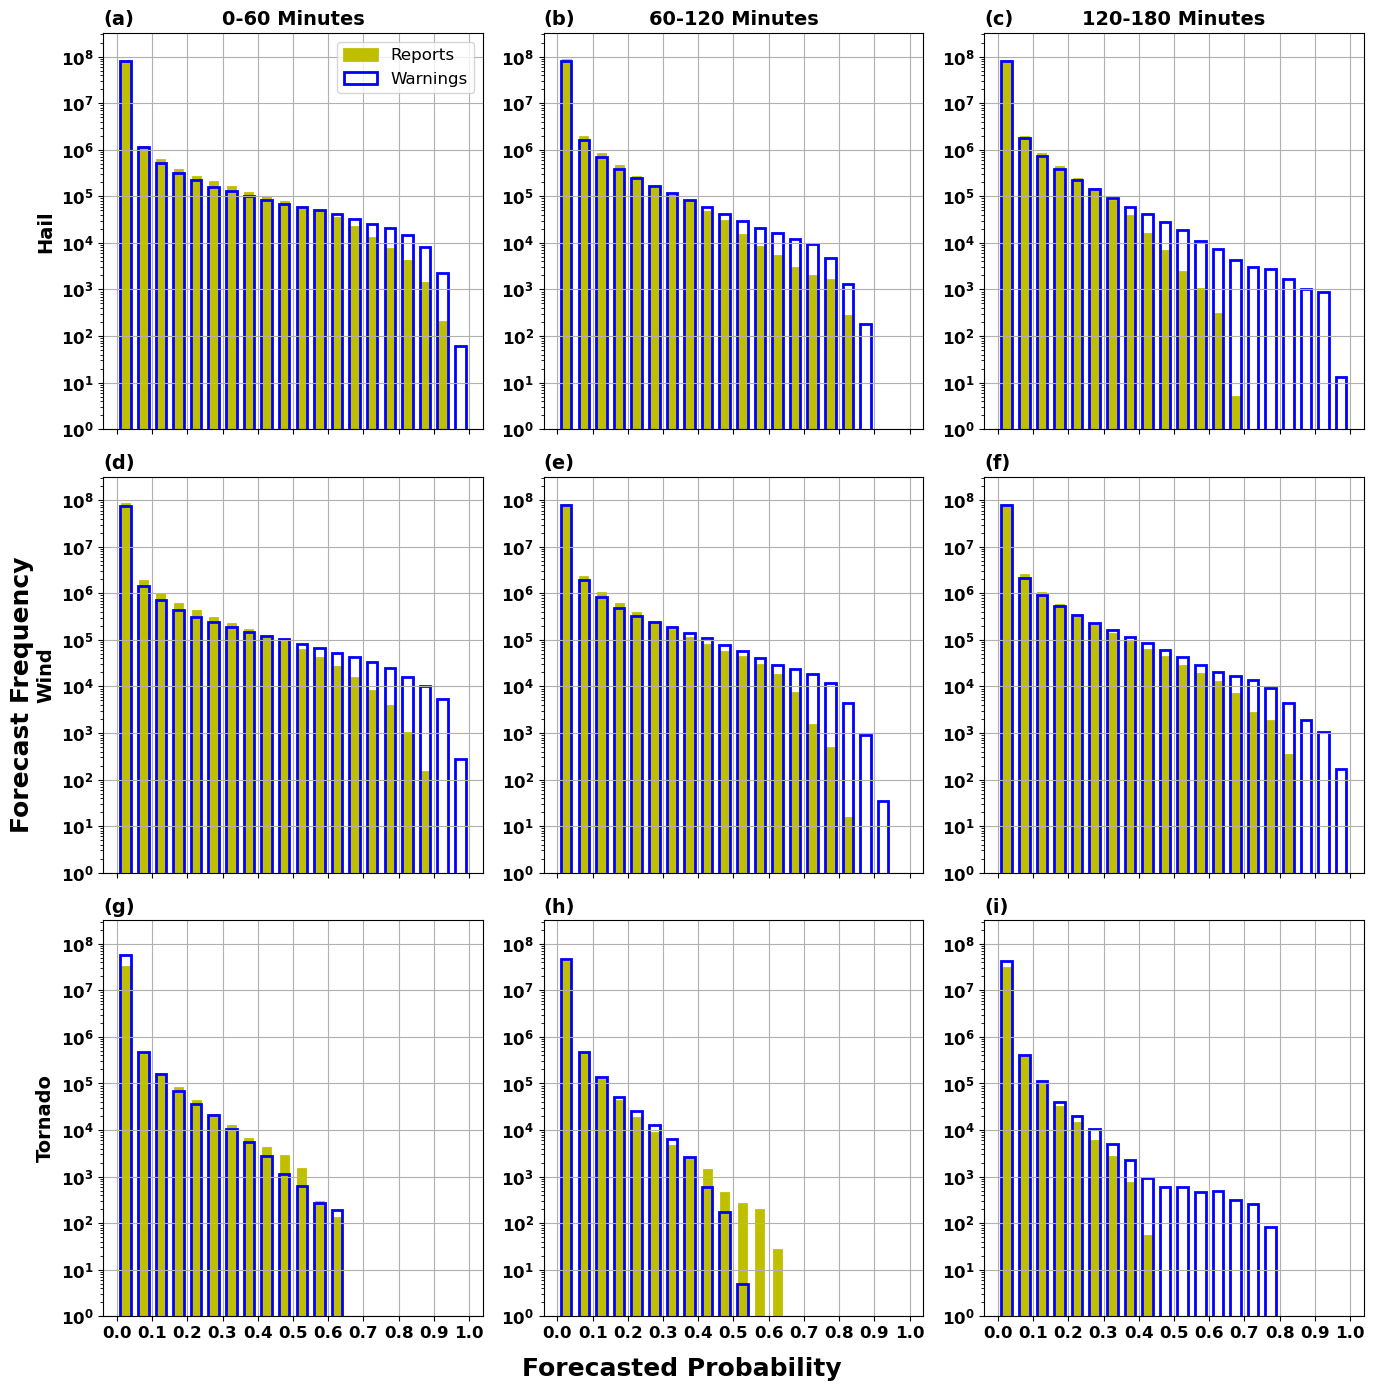

In [9]:
bins = np.arange(0, 1.01, 0.05)
plot_bins = np.arange(-0.025, 1, 0.05)

xticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=12, weight='bold', stretch='normal')
yticks_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=12, weight='bold', stretch='normal')
legend_font = font_manager.FontProperties(family='DejaVu Sans', style='normal',\
                                            size=12, weight='normal', stretch='normal')
subplot_labels = np.array([['(a)', '(b)', '(c)'],\
                           ['(d)', '(e)', '(f)'],\
                           ['(g)', '(h)', '(i)']])

hazards = ['hail', 'wind', 'tornado']
leads = [0, 60, 120]

save_dir = '/work/ryan.martz/wofs_phi_data/experiments/climatologies/climo_figures'
fig, axs = plt.subplots(len(leads),len(hazards))
fig.set_size_inches(14, 14)

for i in range(len(hazards)):
    hazard = hazards[i]
    
    for j in range(len(leads)):
        lead = leads[j]
        
        lsr_probs_dir = '/work/ryan.martz/wofs_phi_data/experiments/climatologies/all_probs/'
        warning_probs_dir = '/work/ryan.martz/wofs_phi_data/experiments/climatologies/all_probs'
        
        lsr_probs_file = '%s_lsrs_all_probs_%s-%smin_top_hour_inits_only.npy' %(hazard, lead, lead+60)
        warning_probs_file = '%s_warnings_all_probs_%s-%smin_top_hour_inits_only.npy' %(hazard, lead, lead+60)

        lsr_probs = np.load('%s/%s' %(lsr_probs_dir, lsr_probs_file))
        lsr_prob_bins = bin_probs(lsr_probs, bins)
        
        warning_probs = np.load('%s/%s' %(warning_probs_dir, warning_probs_file))
        warning_prob_bins = bin_probs(warning_probs, bins)
        
        #if hazard == 'hail' or hazard == 'tornado':
        #    lsr_probs_file_30 = 'wofs_psv3_with_torp_obs_r39km_trained_obs_r39km_verified'\
        #    '_all_%s_test_raw_probs_30-90min.npy' %(hazard)
        #    lsr_probs_30 = np.load('%s/%s' %(lsr_probs_dir, lsr_probs_file_30))
        #    lsr_prob_bins = lsr_prob_bins * (len(lsr_probs_30)/len(lsr_probs))
        #    
        #    warning_probs_file_30 = 'wofs_psv3_with_torp_warnings_r39km_trained_warnings_r39km_verified'\
        #    '_all_%s_test_raw_probs_30-90min.npy' %(hazard)
        #    warning_probs_30 = np.load('%s/%s' %(warning_probs_dir, warning_probs_file_30))
        #    warning_prob_bins = warning_prob_bins * (len(warning_probs_30)/len(warning_probs))
        #else:
        #    lsr_probs_file_30 = 'wofs_psv3_with_torp_obs_r375km_trained_obs_r375km_verified'\
        #    '_all_%s_test_raw_probs_30-90min.npy' %(hazard)
        #    lsr_probs_30 = np.load('%s/%s' %(lsr_probs_dir, lsr_probs_file_30))
        #    lsr_prob_bins = lsr_prob_bins * (len(lsr_probs_30)/len(lsr_probs))
        #    
        #    warning_probs_file_30 = 'wofs_psv3_with_torp_warnings_r375km_trained_warnings_r375km_verified'\
        #    '_all_%s_test_raw_probs_30-90min.npy' %(hazard)
        #    warning_probs_30 = np.load('%s/%s' %(warning_probs_dir, warning_probs_file_30))
        #    warning_prob_bins = warning_prob_bins * (len(warning_probs_30)/len(warning_probs))
            
        #print(len(warning_probs_30)/len(warning_probs))

        axs[i,j].bar(plot_bins[1:], lsr_prob_bins[1:], width = 0.02,\
                   edgecolor = 'y', color = 'y', linewidth = 2,\
                   label = 'Reports')
        axs[i,j].bar(plot_bins[1:], warning_prob_bins[1:], width = 0.03,\
                   edgecolor = 'b', color = 'none', linewidth = 2,\
                   label = 'Warnings')
        axs[i,j].spines["top"].set_visible(True)
        axs[i,j].spines["right"].set_visible(True)
        axs[i,j].set_xticks(plot_bins[::2]+0.025)
        axs[i,j].xaxis.set_ticklabels([])
        axs[i,j].set_yscale('log')
        axs[i,j].set_ylim([10**0,10**8.5])
        axs[i,j].grid(visible = True)
        
        for label in axs[i,j].get_xticklabels():
            label.set_fontproperties(xticks_font)
        for label in axs[i,j].get_yticklabels():
            label.set_fontproperties(yticks_font)

        axs[0,j].set_title('%s-%s Minutes' %(lead, lead+60), fontsize = 14,\
                         fontname = 'DejaVu Sans', fontweight = 'bold')
        axs[i,j].text(0, 1.02, subplot_labels[i,j], weight = 'bold', fontsize = 14,\
                           transform=axs[i,j].transAxes)
        axs[i,j].set_ylim([1,10**8.5])
    
    axs[i,0].set_ylabel(hazard.capitalize(), fontsize = 14,\
                         fontname = 'DejaVu Sans', fontweight = 'bold')
    axs[0,0].legend(prop = legend_font, loc = 'upper right')
    axs[-1,0].xaxis.set_ticks(np.round(plot_bins[::2]+0.025, 1))
    axs[-1,1].xaxis.set_ticks(np.round(plot_bins[::2]+0.025, 1))
    axs[-1,2].xaxis.set_ticks(np.round(plot_bins[::2]+0.025, 1))
    axs[-1,0].xaxis.set_ticklabels(np.round(plot_bins[::2]+0.025, 1))
    axs[-1,1].xaxis.set_ticklabels(np.round(plot_bins[::2]+0.025, 1))
    axs[-1,2].xaxis.set_ticklabels(np.round(plot_bins[::2]+0.025, 1))
fig.supylabel('Forecast Frequency', fontsize = 18,\
              fontname = 'DejaVu Sans', fontweight = 'bold')
fig.supxlabel('Forecasted Probability', fontsize = 18,\
              fontname = 'DejaVu Sans', fontweight = 'bold')
#fig.suptitle(hazard.capitalize(), fontsize = 15,\
#             fontname = 'DejaVu Sans', fontweight = 'bold')
plt.tight_layout()

save_file = 'warnings_vs_lsrs_prob_focus.png'
fig.savefig('%s/%s' %(save_dir, save_file), dpi=300)

In [12]:
hazard = 'wind'
lead = 60
lsr_probs_dir = '/work/ryan.martz/wofs_phi_data/obs_train/test_fcsts/'\
'wofs_psv3_with_torp/%s/wofslag_25/length_60' %(hazard)
warning_probs_dir = '/work/ryan.martz/wofs_phi_data/warnings_train/test_fcsts/'\
'wofs_psv3_with_torp/%s/wofslag_25/length_60' %(hazard)
if hazard == 'hail' or hazard == 'tornado':
    lsr_probs_file_60 = 'wofs_psv3_with_torp_obs_r39km_trained_obs_r39km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
    warning_probs_file_60 = 'wofs_psv3_with_torp_warnings_r39km_trained_obs_r39km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
else:
    lsr_probs_file_60 = 'wofs_psv3_with_torp_obs_r375km_trained_obs_r375km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
    warning_probs_file_60 = 'wofs_psv3_with_torp_warnings_r375km_trained_obs_r375km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)

lsr_probs_60 = np.load('%s/%s' %(lsr_probs_dir, lsr_probs_file_60))
lsr_prob_bins_60 = bin_probs(lsr_probs_60, bins)

warning_probs_60 = np.load('%s/%s' %(warning_probs_dir, warning_probs_file_60))
warning_prob_bins_60 = bin_probs(warning_probs_60, bins)

lead = 120
lsr_probs_dir = '/work/ryan.martz/wofs_phi_data/obs_train/test_fcsts/'\
'wofs_psv3_with_torp/%s/wofslag_25/length_60' %(hazard)
warning_probs_dir = '/work/ryan.martz/wofs_phi_data/warnings_train/test_fcsts/'\
'wofs_psv3_with_torp/%s/wofslag_25/length_60' %(hazard)
if hazard == 'hail' or hazard == 'tornado':
    lsr_probs_file_120 = 'wofs_psv3_with_torp_obs_r39km_trained_obs_r39km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
    warning_probs_file_120 = 'wofs_psv3_with_torp_warnings_r39km_trained_obs_r39km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
else:
    lsr_probs_file_120 = 'wofs_psv3_with_torp_obs_r375km_trained_obs_r375km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)
    warning_probs_file_120 = 'wofs_psv3_with_torp_warnings_r375km_trained_obs_r375km_verified'\
    '_all_%s_test_raw_probs_%s-%smin.npy' %(hazard, lead+30, lead+90)

lsr_probs_120 = np.load('%s/%s' %(lsr_probs_dir, lsr_probs_file_120))
lsr_prob_bins_120 = bin_probs(lsr_probs_120, bins)
lsr_prob_bins_120 = lsr_prob_bins_120 * (len(lsr_probs_60)/len(lsr_probs_120))

warning_probs_120 = np.load('%s/%s' %(warning_probs_dir, warning_probs_file_120))
warning_prob_bins_120 = bin_probs(warning_probs_120, bins)
warning_prob_bins_120 = warning_prob_bins_120 * (len(warning_probs_60)/len(warning_probs_120))

In [13]:
warning_prob_bins_60

array([  7139167, 110271854,   3064264,   1346145,    784282,    543005,
          397132,    310471,    242897,    186566,    135364,     97258,
           70463,     51232,     39512,     31367,     20503,      7376,
            1107,        35,         0])

In [14]:
warning_prob_bins_120

array([9.07392964e+06, 1.09069282e+08, 2.95739413e+06, 1.29429040e+06,
       7.40067371e+05, 4.76103034e+05, 3.27435775e+05, 2.33418539e+05,
       1.64067573e+05, 1.18733056e+05, 8.74864719e+04, 6.11340674e+04,
       4.10420225e+04, 2.90253034e+04, 2.33100000e+04, 1.92468539e+04,
       1.34324494e+04, 6.22638202e+03, 2.64175281e+03, 1.49642697e+03,
       2.36426966e+02])

In [15]:
warning_prob_bins_60 - warning_prob_bins_120

array([-1.93476264e+06,  1.20257169e+06,  1.06869865e+05,  5.18545955e+04,
        4.42146292e+04,  6.69019663e+04,  6.96962247e+04,  7.70524607e+04,
        7.88294270e+04,  6.78329438e+04,  4.78775281e+04,  3.61239326e+04,
        2.94209775e+04,  2.22066966e+04,  1.62020000e+04,  1.21201461e+04,
        7.07055056e+03,  1.14961798e+03, -1.53475281e+03, -1.46142697e+03,
       -2.36426966e+02])

In [8]:
a = np.array([1, 2, 3, 4])
b = np.delete(a, 2)

In [9]:
b

array([1, 2, 4])

In [14]:
sum0330z = 0
sum04z = 0
sum0430z = 0
sum05z = 0
totalsum = 0
for date in os.listdir('/work/ryan.martz/wofs_phi_data/warnings_train/test_fcsts/wofs_psv3_with_torp/hail/wofslag_25/length_60'):
    if '.' in date:
        continue
    if '0400' in os.listdir('/work/ryan.martz/wofs_phi_data/warnings_train/test_fcsts/wofs_psv3_with_torp/hail/wofslag_25/length_60/%s' %(date))\
    or '0500' in os.listdir('/work/ryan.martz/wofs_phi_data/warnings_train/test_fcsts/wofs_psv3_with_torp/hail/wofslag_25/length_60/%s' %(date)):
        totalsum += 1
print(totalsum)

37
